In [1]:
!pip install openai-clip

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.8 MB/s eta 0:00:00 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.0/774.0 kB 84.2 MB/s eta 0:00:00
  Created wheel for openai-clip: filename=openai_clip-1.0.1-py3-none-any.whl size=1368647 sha256=202668c38c05b0c128b61329e9f1bc57f97a9435e2c71c956a5e69cd65ba7f07
  Stored in directory: /home/ubuntu/.cache/pip/wheels/08/77/8e/8d2f862df6bf7fb4e2007062d2cbaeae49862ec7b56d041229
Successfully built openai-clip
DEPRECATION: flatbuffers 1.12.1-git20200711.33e2d80-dfsg1-0.6 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of flatbuffers or contact the author to suggest th

In [2]:
pip install torchvision

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: flatbuffers 1.12.1-git20200711.33e2d80-dfsg1-0.6 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of flatbuffers or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())  # Check if CUDA is available for GPU usage

2.0.1
True


In [4]:
pip install torch==2.0.1 torchvision torchaudio --upgrade

Defaulting to user installation because normal site-packages is not writeable
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 166.1 MB/s eta 0:00:00
DEPRECATION: flatbuffers 1.12.1-git20200711.33e2d80-dfsg1-0.6 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of flatbuffers or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use upd

In [6]:
pip install transformers

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.6/137.6 kB 3.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 134.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 110.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 185.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 31.6 MB/s eta 0:00:00
DEPRECATION: flatbuffers 1.12.1-git20200711.33e2d80-dfsg1-0.6 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of flatbuffers or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1

In [7]:
#For Parsing json data
import json

#For Loading Images
from PIL import Image

#For displaying loadbar
from tqdm import tqdm

#Importing pytorch to finetune our clip
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

#Here, we import clip model developed by meta
import clip

#Constructs a CLIP processor which wraps a CLIP image processor and a CLIP tokenizer into a single processor.
from transformers import CLIPProcessor, CLIPModel

In [8]:
# Respective Paths

json_path = 'meta_data.json'
image_path = 'images_tinea/'

In [9]:
input_data = []

with open(json_path, 'r') as f:
    input_data = json.load(f)  # This loads the entire JSON array into input_data

# Now input_data contains all the image data
print(len(input_data))  # Prints the number of entries
print(input_data[0])  # Prints the first entry to verify

405
{'image': '001.jpg', 'image_path': 'images_tinea/001.jpg', 'title': 'tinea type of rash at the beard area on a fair skin'}


In [10]:
# Load the CLIP model and processor
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

/usr/lib/python3/dist-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
2024-04-18 20:28:29.778987: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-18 20:28:30.212114: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX512F AVX512_VNNI, in other operations, rebuild TensorFlow with the appropriate compiler flags.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [11]:
# Choose computation device
device = "cuda:0" if torch.cuda.is_available() else "cpu" 

# Load pre-trained CLIP model
model, preprocess = clip.load("ViT-B/32", device=device, jit=False)


100%|███████████████████████████████████████| 338M/338M [00:24<00:00, 14.2MiB/s]


In [12]:
# Define a custom dataset
class image_title_dataset():
    def __init__(self, list_image_path,list_txt):
        # Initialize image paths and corresponding texts
        self.image_path = list_image_path
        # Tokenize text using CLIP's tokenizer
        self.title  = clip.tokenize(list_txt)

    def __len__(self):
        return len(self.title)

    def __getitem__(self, idx):
        # Preprocess image using CLIP's preprocessing function
        image = preprocess(Image.open(self.image_path[idx]))
        title = self.title[idx]
        return image, title

In [13]:
# use your own data
list_image_path = []
list_txt = []
for item in input_data:
  img_path = image_path + item['image_path'].split('/')[-1]
  
  #As we have image text pair, we use product title as description.
  caption = item['title'][:40]
  list_image_path.append(img_path)
  list_txt.append(caption)


In [14]:
dataset = image_title_dataset(list_image_path, list_txt)
train_dataloader = DataLoader(dataset, batch_size=100, shuffle=True) 

In [15]:
# Function to convert model's parameters to FP32 format
#This is done so that our model loads in the provided memory.
def convert_models_to_fp32(model): 
    for p in model.parameters(): 
        p.data = p.data.float() 
        p.grad.data = p.grad.data.float() 

In [16]:
# Check if the device is set to CPU
if device == "cpu":
    model.float()  # Convert the model's parameters to float if using CPU

In [17]:
# Prepare the optimizer
optimizer = torch.optim.Adam(
    model.parameters(), lr=5e-5, betas=(0.9, 0.98), eps=1e-6 ,weight_decay=0.2) 
    
# Adam optimizer is used with specific hyperparameters
# lr (learning rate) is set to 5e-5, which is considered safe for fine-tuning to a new dataset
# betas are used for the optimization algorithm
# eps is a small value to prevent division by zero
# weight_decay adds L2 regularization to the optimizer

# Specify the loss function for images
loss_img = nn.CrossEntropyLoss()

# Specify the loss function for text
loss_txt = nn.CrossEntropyLoss()

In [34]:
# Train the model
num_epochs = 50 # Number of training epochs
for epoch in range(num_epochs):
    pbar = tqdm(train_dataloader, total=len(train_dataloader))
    
    # Iterate through the batches in the training data
    for batch in pbar:
        optimizer.zero_grad()  # Zero out gradients for the optimizer
        
        # Extract images and texts from the batch
        images, texts = batch
        
        # Print the current device (CPU or GPU)
        print(device)
        
        # Move images and texts to the specified device (CPU or GPU)
        images = images.to(device)
        texts = texts.to(device)

        # Forward pass through the model
        logits_per_image, logits_per_text = model(images, texts)

        # Compute the loss
        ground_truth = torch.arange(len(images), dtype=torch.long, device=device)
        total_loss = (loss_img(logits_per_image, ground_truth) + loss_txt(logits_per_text, ground_truth)) / 2

        # Backward pass and update the model's parameters
        total_loss.backward()
        
        # If the device is CPU, directly update the model
        if device == "cpu":
            optimizer.step()
        else:
            # Convert model's parameters to FP32 format, update, and convert back
            convert_models_to_fp32(model)
            optimizer.step()
            clip.model.convert_weights(model)

        # Update the progress bar with the current epoch and loss
        pbar.set_description(f"Epoch {epoch}/{num_epochs}, Loss: {total_loss.item():.4f}")


Epoch 0/50, Loss: 4.1172:  20%|██        | 1/5 [00:00<00:03,  1.30it/s]

cuda


Epoch 0/50, Loss: 4.0547:  40%|████      | 2/5 [00:01<00:02,  1.29it/s]

cuda


Epoch 0/50, Loss: 4.0469:  60%|██████    | 3/5 [00:02<00:01,  1.30it/s]

cuda


Epoch 0/50, Loss: 4.0312:  80%|████████  | 4/5 [00:03<00:00,  1.30it/s]

cuda


Epoch 0/50, Loss: 0.7842: 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]


cuda


Epoch 1/50, Loss: 3.9922:  20%|██        | 1/5 [00:00<00:03,  1.31it/s]

cuda


Epoch 1/50, Loss: 4.2383:  40%|████      | 2/5 [00:01<00:02,  1.30it/s]

cuda


Epoch 1/50, Loss: 3.8398:  60%|██████    | 3/5 [00:02<00:01,  1.30it/s]

cuda


Epoch 1/50, Loss: 4.0898:  80%|████████  | 4/5 [00:03<00:00,  1.29it/s]

cuda


Epoch 1/50, Loss: 1.3945: 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


cuda


Epoch 2/50, Loss: 4.1367:  20%|██        | 1/5 [00:00<00:03,  1.31it/s]

cuda


Epoch 2/50, Loss: 3.9805:  40%|████      | 2/5 [00:01<00:02,  1.29it/s]

cuda


Epoch 2/50, Loss: 3.8906:  60%|██████    | 3/5 [00:02<00:01,  1.30it/s]

cuda


Epoch 2/50, Loss: 4.1875:  80%|████████  | 4/5 [00:03<00:00,  1.29it/s]

cuda


Epoch 2/50, Loss: 1.0332: 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


cuda


Epoch 3/50, Loss: 4.0703:  20%|██        | 1/5 [00:00<00:03,  1.28it/s]

cuda


Epoch 3/50, Loss: 4.0430:  40%|████      | 2/5 [00:01<00:02,  1.28it/s]

cuda


Epoch 3/50, Loss: 4.0156:  60%|██████    | 3/5 [00:02<00:01,  1.29it/s]

cuda


Epoch 3/50, Loss: 4.0273:  80%|████████  | 4/5 [00:03<00:00,  1.29it/s]

cuda


Epoch 3/50, Loss: 0.9897: 100%|██████████| 5/5 [00:03<00:00,  1.57it/s]


cuda


Epoch 4/50, Loss: 4.2188:  20%|██        | 1/5 [00:00<00:03,  1.30it/s]

cuda


Epoch 4/50, Loss: 3.9727:  40%|████      | 2/5 [00:01<00:02,  1.29it/s]

cuda


Epoch 4/50, Loss: 3.9355:  60%|██████    | 3/5 [00:02<00:01,  1.29it/s]

cuda


Epoch 4/50, Loss: 4.0469:  80%|████████  | 4/5 [00:03<00:00,  1.29it/s]

cuda


Epoch 4/50, Loss: 1.0098: 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


cuda


Epoch 5/50, Loss: 3.9414:  20%|██        | 1/5 [00:00<00:03,  1.29it/s]

cuda


Epoch 5/50, Loss: 3.9902:  40%|████      | 2/5 [00:01<00:02,  1.29it/s]

cuda


Epoch 5/50, Loss: 4.0273:  60%|██████    | 3/5 [00:02<00:01,  1.29it/s]

cuda


Epoch 5/50, Loss: 4.1953:  80%|████████  | 4/5 [00:03<00:00,  1.30it/s]

cuda


Epoch 5/50, Loss: 1.1641: 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


cuda


Epoch 6/50, Loss: 4.0273:  20%|██        | 1/5 [00:00<00:03,  1.31it/s]

cuda


Epoch 6/50, Loss: 4.0781:  40%|████      | 2/5 [00:01<00:02,  1.30it/s]

cuda


Epoch 6/50, Loss: 3.8828:  60%|██████    | 3/5 [00:02<00:01,  1.30it/s]

cuda


Epoch 6/50, Loss: 4.2031:  80%|████████  | 4/5 [00:03<00:00,  1.30it/s]

cuda


Epoch 6/50, Loss: 1.1670: 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


cuda


Epoch 7/50, Loss: 4.0938:  20%|██        | 1/5 [00:00<00:03,  1.29it/s]

cuda


Epoch 7/50, Loss: 4.0586:  40%|████      | 2/5 [00:01<00:02,  1.31it/s]

cuda


Epoch 7/50, Loss: 4.0625:  60%|██████    | 3/5 [00:02<00:01,  1.30it/s]

cuda


Epoch 7/50, Loss: 3.9922:  80%|████████  | 4/5 [00:03<00:00,  1.30it/s]

cuda


Epoch 7/50, Loss: 0.9697: 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]


cuda


Epoch 8/50, Loss: 4.1953:  20%|██        | 1/5 [00:00<00:03,  1.31it/s]

cuda


Epoch 8/50, Loss: 3.9570:  40%|████      | 2/5 [00:01<00:02,  1.30it/s]

cuda


Epoch 8/50, Loss: 4.1211:  60%|██████    | 3/5 [00:02<00:01,  1.29it/s]

cuda


Epoch 8/50, Loss: 3.8672:  80%|████████  | 4/5 [00:03<00:00,  1.30it/s]

cuda


Epoch 8/50, Loss: 2.0117: 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]


cuda


Epoch 9/50, Loss: 4.0703:  20%|██        | 1/5 [00:00<00:03,  1.31it/s]

cuda


Epoch 9/50, Loss: 4.0703:  40%|████      | 2/5 [00:01<00:02,  1.30it/s]

cuda


Epoch 9/50, Loss: 3.9727:  60%|██████    | 3/5 [00:02<00:01,  1.29it/s]

cuda


Epoch 9/50, Loss: 4.0742:  80%|████████  | 4/5 [00:03<00:00,  1.29it/s]

cuda


Epoch 9/50, Loss: 1.4180: 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


cuda


Epoch 10/50, Loss: 4.0703:  20%|██        | 1/5 [00:00<00:03,  1.30it/s]

cuda


Epoch 10/50, Loss: 4.0078:  40%|████      | 2/5 [00:01<00:02,  1.29it/s]

cuda


Epoch 10/50, Loss: 3.9023:  60%|██████    | 3/5 [00:02<00:01,  1.30it/s]

cuda


Epoch 10/50, Loss: 4.1953:  80%|████████  | 4/5 [00:03<00:00,  1.30it/s]

cuda


Epoch 10/50, Loss: 1.7500: 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


cuda


Epoch 11/50, Loss: 3.9629:  20%|██        | 1/5 [00:00<00:03,  1.31it/s]

cuda


Epoch 11/50, Loss: 4.0469:  40%|████      | 2/5 [00:01<00:02,  1.30it/s]

cuda


Epoch 11/50, Loss: 3.9609:  60%|██████    | 3/5 [00:02<00:01,  1.30it/s]

cuda


Epoch 11/50, Loss: 4.2461:  80%|████████  | 4/5 [00:03<00:00,  1.30it/s]

cuda


Epoch 11/50, Loss: 1.1279: 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]


cuda


Epoch 12/50, Loss: 3.9180:  20%|██        | 1/5 [00:00<00:03,  1.30it/s]

cuda


Epoch 12/50, Loss: 4.2266:  40%|████      | 2/5 [00:01<00:02,  1.30it/s]

cuda


Epoch 12/50, Loss: 4.0391:  60%|██████    | 3/5 [00:02<00:01,  1.30it/s]

cuda


Epoch 12/50, Loss: 4.0391:  80%|████████  | 4/5 [00:03<00:00,  1.30it/s]

cuda


Epoch 12/50, Loss: 0.9590: 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]


cuda


Epoch 13/50, Loss: 4.0938:  20%|██        | 1/5 [00:00<00:03,  1.28it/s]

cuda


Epoch 13/50, Loss: 3.9668:  40%|████      | 2/5 [00:01<00:02,  1.28it/s]

cuda


Epoch 13/50, Loss: 3.9727:  60%|██████    | 3/5 [00:02<00:01,  1.29it/s]

cuda


Epoch 13/50, Loss: 4.1992:  80%|████████  | 4/5 [00:03<00:00,  1.29it/s]

cuda


Epoch 13/50, Loss: 0.8018: 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


cuda


Epoch 14/50, Loss: 4.2812:  20%|██        | 1/5 [00:00<00:03,  1.31it/s]

cuda


Epoch 14/50, Loss: 3.8320:  40%|████      | 2/5 [00:01<00:02,  1.30it/s]

cuda


Epoch 14/50, Loss: 4.1680:  60%|██████    | 3/5 [00:02<00:01,  1.30it/s]

cuda


Epoch 14/50, Loss: 3.9141:  80%|████████  | 4/5 [00:03<00:00,  1.30it/s]

cuda


Epoch 14/50, Loss: 1.0732: 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]


cuda


Epoch 15/50, Loss: 4.0703:  20%|██        | 1/5 [00:00<00:03,  1.32it/s]

cuda


Epoch 15/50, Loss: 3.9902:  40%|████      | 2/5 [00:01<00:02,  1.30it/s]

cuda


Epoch 15/50, Loss: 4.0273:  60%|██████    | 3/5 [00:02<00:01,  1.30it/s]

cuda


Epoch 15/50, Loss: 4.1055:  80%|████████  | 4/5 [00:03<00:00,  1.30it/s]

cuda


Epoch 15/50, Loss: 1.5693: 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]


cuda


Epoch 16/50, Loss: 4.2031:  20%|██        | 1/5 [00:00<00:03,  1.30it/s]

cuda


Epoch 16/50, Loss: 4.0938:  40%|████      | 2/5 [00:01<00:02,  1.30it/s]

cuda


Epoch 16/50, Loss: 3.8867:  60%|██████    | 3/5 [00:02<00:01,  1.30it/s]

cuda


Epoch 16/50, Loss: 4.0664:  80%|████████  | 4/5 [00:03<00:00,  1.30it/s]

cuda


Epoch 16/50, Loss: 1.1309: 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


cuda


Epoch 17/50, Loss: 4.0977:  20%|██        | 1/5 [00:00<00:03,  1.31it/s]

cuda


Epoch 17/50, Loss: 4.0352:  40%|████      | 2/5 [00:01<00:02,  1.30it/s]

cuda


Epoch 17/50, Loss: 4.0625:  60%|██████    | 3/5 [00:02<00:01,  1.30it/s]

cuda


Epoch 17/50, Loss: 4.0039:  80%|████████  | 4/5 [00:03<00:00,  1.30it/s]

cuda


Epoch 17/50, Loss: 0.8667: 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]


cuda


Epoch 18/50, Loss: 4.1992:  20%|██        | 1/5 [00:00<00:03,  1.30it/s]

cuda


Epoch 18/50, Loss: 4.0391:  40%|████      | 2/5 [00:01<00:02,  1.29it/s]

cuda


Epoch 18/50, Loss: 3.9727:  60%|██████    | 3/5 [00:02<00:01,  1.29it/s]

cuda


Epoch 18/50, Loss: 3.9805:  80%|████████  | 4/5 [00:03<00:00,  1.29it/s]

cuda


Epoch 18/50, Loss: 1.2441: 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


cuda


Epoch 19/50, Loss: 4.1406:  20%|██        | 1/5 [00:00<00:03,  1.32it/s]

cuda


Epoch 19/50, Loss: 4.1484:  40%|████      | 2/5 [00:01<00:02,  1.31it/s]

cuda


Epoch 19/50, Loss: 3.7715:  60%|██████    | 3/5 [00:02<00:01,  1.30it/s]

cuda


Epoch 19/50, Loss: 4.1758:  80%|████████  | 4/5 [00:03<00:00,  1.29it/s]

cuda


Epoch 19/50, Loss: 0.8301: 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


cuda


Epoch 20/50, Loss: 4.3594:  20%|██        | 1/5 [00:00<00:03,  1.28it/s]

cuda


Epoch 20/50, Loss: 3.8477:  40%|████      | 2/5 [00:01<00:02,  1.29it/s]

cuda


Epoch 20/50, Loss: 3.9023:  60%|██████    | 3/5 [00:02<00:01,  1.29it/s]

cuda


Epoch 20/50, Loss: 4.0742:  80%|████████  | 4/5 [00:03<00:00,  1.29it/s]

cuda


Epoch 20/50, Loss: 1.3359: 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


cuda


Epoch 21/50, Loss: 4.0938:  20%|██        | 1/5 [00:00<00:03,  1.30it/s]

cuda


Epoch 21/50, Loss: 4.1719:  40%|████      | 2/5 [00:01<00:02,  1.30it/s]

cuda


Epoch 21/50, Loss: 3.7773:  60%|██████    | 3/5 [00:02<00:01,  1.30it/s]

cuda


Epoch 21/50, Loss: 4.1250:  80%|████████  | 4/5 [00:03<00:00,  1.30it/s]

cuda


Epoch 21/50, Loss: 1.0928: 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]


cuda


Epoch 22/50, Loss: 4.0156:  20%|██        | 1/5 [00:00<00:03,  1.31it/s]

cuda


Epoch 22/50, Loss: 4.0938:  40%|████      | 2/5 [00:01<00:02,  1.29it/s]

cuda


Epoch 22/50, Loss: 4.1016:  60%|██████    | 3/5 [00:02<00:01,  1.30it/s]

cuda


Epoch 22/50, Loss: 3.9785:  80%|████████  | 4/5 [00:03<00:00,  1.30it/s]

cuda


Epoch 22/50, Loss: 1.2207: 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


cuda


Epoch 23/50, Loss: 4.2266:  20%|██        | 1/5 [00:00<00:03,  1.30it/s]

cuda


Epoch 23/50, Loss: 4.1602:  40%|████      | 2/5 [00:01<00:02,  1.30it/s]

cuda


Epoch 23/50, Loss: 3.8340:  60%|██████    | 3/5 [00:02<00:01,  1.30it/s]

cuda


Epoch 23/50, Loss: 3.9492:  80%|████████  | 4/5 [00:03<00:00,  1.29it/s]

cuda


Epoch 23/50, Loss: 0.7012: 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


cuda


Epoch 24/50, Loss: 3.8438:  20%|██        | 1/5 [00:00<00:03,  1.32it/s]

cuda


Epoch 24/50, Loss: 3.9629:  40%|████      | 2/5 [00:01<00:02,  1.30it/s]

cuda


Epoch 24/50, Loss: 4.1211:  60%|██████    | 3/5 [00:02<00:01,  1.30it/s]

cuda


Epoch 24/50, Loss: 4.2031:  80%|████████  | 4/5 [00:03<00:00,  1.30it/s]

cuda


Epoch 24/50, Loss: 1.0840: 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]


cuda


Epoch 25/50, Loss: 4.0000:  20%|██        | 1/5 [00:00<00:03,  1.31it/s]

cuda


Epoch 25/50, Loss: 3.9297:  40%|████      | 2/5 [00:01<00:02,  1.30it/s]

cuda


Epoch 25/50, Loss: 4.0508:  60%|██████    | 3/5 [00:02<00:01,  1.29it/s]

cuda


Epoch 25/50, Loss: 4.1406:  80%|████████  | 4/5 [00:03<00:00,  1.30it/s]

cuda


Epoch 25/50, Loss: 1.4668: 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


cuda


Epoch 26/50, Loss: 3.9590:  20%|██        | 1/5 [00:00<00:03,  1.30it/s]

cuda


Epoch 26/50, Loss: 4.0469:  40%|████      | 2/5 [00:01<00:02,  1.30it/s]

cuda


Epoch 26/50, Loss: 4.0703:  60%|██████    | 3/5 [00:02<00:01,  1.30it/s]

cuda


Epoch 26/50, Loss: 4.0781:  80%|████████  | 4/5 [00:03<00:00,  1.30it/s]

cuda


Epoch 26/50, Loss: 1.4316: 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]


cuda


Epoch 27/50, Loss: 4.0078:  20%|██        | 1/5 [00:00<00:03,  1.30it/s]

cuda


Epoch 27/50, Loss: 4.1406:  40%|████      | 2/5 [00:01<00:02,  1.31it/s]

cuda


Epoch 27/50, Loss: 3.8965:  60%|██████    | 3/5 [00:02<00:01,  1.30it/s]

cuda


Epoch 27/50, Loss: 4.0547:  80%|████████  | 4/5 [00:03<00:00,  1.30it/s]

cuda


Epoch 27/50, Loss: 2.1211: 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]


cuda


Epoch 28/50, Loss: 3.8359:  20%|██        | 1/5 [00:00<00:03,  1.30it/s]

cuda


Epoch 28/50, Loss: 4.0195:  40%|████      | 2/5 [00:01<00:02,  1.30it/s]

cuda


Epoch 28/50, Loss: 4.1797:  60%|██████    | 3/5 [00:02<00:01,  1.30it/s]

cuda


Epoch 28/50, Loss: 4.1055:  80%|████████  | 4/5 [00:03<00:00,  1.31it/s]

cuda


Epoch 28/50, Loss: 0.8120: 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]


cuda


Epoch 29/50, Loss: 4.0586:  20%|██        | 1/5 [00:00<00:03,  1.32it/s]

cuda


Epoch 29/50, Loss: 4.0469:  40%|████      | 2/5 [00:01<00:02,  1.31it/s]

cuda


Epoch 29/50, Loss: 4.0273:  60%|██████    | 3/5 [00:02<00:01,  1.30it/s]

cuda


Epoch 29/50, Loss: 4.0703:  80%|████████  | 4/5 [00:03<00:00,  1.30it/s]

cuda


Epoch 29/50, Loss: 1.7363: 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]


cuda


Epoch 30/50, Loss: 4.2109:  20%|██        | 1/5 [00:00<00:03,  1.31it/s]

cuda


Epoch 30/50, Loss: 4.0781:  40%|████      | 2/5 [00:01<00:02,  1.31it/s]

cuda


Epoch 30/50, Loss: 3.9570:  60%|██████    | 3/5 [00:02<00:01,  1.30it/s]

cuda


Epoch 30/50, Loss: 3.9297:  80%|████████  | 4/5 [00:03<00:00,  1.30it/s]

cuda


Epoch 30/50, Loss: 0.9150: 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]


cuda


Epoch 31/50, Loss: 3.9805:  20%|██        | 1/5 [00:00<00:03,  1.31it/s]

cuda


Epoch 31/50, Loss: 4.0820:  40%|████      | 2/5 [00:01<00:02,  1.30it/s]

cuda


Epoch 31/50, Loss: 3.9922:  60%|██████    | 3/5 [00:02<00:01,  1.30it/s]

cuda


Epoch 31/50, Loss: 4.0938:  80%|████████  | 4/5 [00:03<00:00,  1.29it/s]

cuda


Epoch 31/50, Loss: 1.3535: 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


cuda


Epoch 32/50, Loss: 4.0547:  20%|██        | 1/5 [00:00<00:03,  1.30it/s]

cuda


Epoch 32/50, Loss: 3.9883:  40%|████      | 2/5 [00:01<00:02,  1.29it/s]

cuda


Epoch 32/50, Loss: 4.1406:  60%|██████    | 3/5 [00:02<00:01,  1.29it/s]

cuda


Epoch 32/50, Loss: 4.0039:  80%|████████  | 4/5 [00:03<00:00,  1.29it/s]

cuda


Epoch 32/50, Loss: 0.6079: 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


cuda


Epoch 33/50, Loss: 4.0938:  20%|██        | 1/5 [00:00<00:03,  1.29it/s]

cuda


Epoch 33/50, Loss: 4.0703:  40%|████      | 2/5 [00:01<00:02,  1.31it/s]

cuda


Epoch 33/50, Loss: 4.0469:  60%|██████    | 3/5 [00:02<00:01,  1.31it/s]

cuda


Epoch 33/50, Loss: 3.9727:  80%|████████  | 4/5 [00:03<00:00,  1.31it/s]

cuda


Epoch 33/50, Loss: 1.2637: 100%|██████████| 5/5 [00:03<00:00,  1.60it/s]


cuda


Epoch 34/50, Loss: 4.0703:  20%|██        | 1/5 [00:00<00:03,  1.30it/s]

cuda


Epoch 34/50, Loss: 3.9727:  40%|████      | 2/5 [00:01<00:02,  1.30it/s]

cuda


Epoch 34/50, Loss: 4.0117:  60%|██████    | 3/5 [00:02<00:01,  1.29it/s]

cuda


Epoch 34/50, Loss: 4.1133:  80%|████████  | 4/5 [00:03<00:00,  1.30it/s]

cuda


Epoch 34/50, Loss: 0.7510: 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]


cuda


Epoch 35/50, Loss: 4.1250:  20%|██        | 1/5 [00:00<00:03,  1.28it/s]

cuda


Epoch 35/50, Loss: 4.1250:  40%|████      | 2/5 [00:01<00:02,  1.30it/s]

cuda


Epoch 35/50, Loss: 4.0586:  60%|██████    | 3/5 [00:02<00:01,  1.30it/s]

cuda


Epoch 35/50, Loss: 3.8945:  80%|████████  | 4/5 [00:03<00:00,  1.29it/s]

cuda


Epoch 35/50, Loss: 0.8447: 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


cuda


Epoch 36/50, Loss: 4.0156:  20%|██        | 1/5 [00:00<00:03,  1.31it/s]

cuda


Epoch 36/50, Loss: 4.0977:  40%|████      | 2/5 [00:01<00:02,  1.30it/s]

cuda


Epoch 36/50, Loss: 4.0352:  60%|██████    | 3/5 [00:02<00:01,  1.31it/s]

cuda


Epoch 36/50, Loss: 4.0742:  80%|████████  | 4/5 [00:03<00:00,  1.31it/s]

cuda


Epoch 36/50, Loss: 0.8809: 100%|██████████| 5/5 [00:03<00:00,  1.60it/s]


cuda


Epoch 37/50, Loss: 4.0391:  20%|██        | 1/5 [00:00<00:03,  1.31it/s]

cuda


Epoch 37/50, Loss: 4.1016:  40%|████      | 2/5 [00:01<00:02,  1.30it/s]

cuda


Epoch 37/50, Loss: 4.1055:  60%|██████    | 3/5 [00:02<00:01,  1.30it/s]

cuda


Epoch 37/50, Loss: 3.8945:  80%|████████  | 4/5 [00:03<00:00,  1.30it/s]

cuda


Epoch 37/50, Loss: 0.9126: 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


cuda


Epoch 38/50, Loss: 3.9883:  20%|██        | 1/5 [00:00<00:03,  1.30it/s]

cuda


Epoch 38/50, Loss: 4.0195:  40%|████      | 2/5 [00:01<00:02,  1.30it/s]

cuda


Epoch 38/50, Loss: 4.0391:  60%|██████    | 3/5 [00:02<00:01,  1.31it/s]

cuda


Epoch 38/50, Loss: 4.1797:  80%|████████  | 4/5 [00:03<00:00,  1.31it/s]

cuda


Epoch 38/50, Loss: 0.8101: 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]


cuda


Epoch 39/50, Loss: 4.1250:  20%|██        | 1/5 [00:00<00:03,  1.31it/s]

cuda


Epoch 39/50, Loss: 4.0781:  40%|████      | 2/5 [00:01<00:02,  1.30it/s]

cuda


Epoch 39/50, Loss: 4.0117:  60%|██████    | 3/5 [00:02<00:01,  1.31it/s]

cuda


Epoch 39/50, Loss: 3.9688:  80%|████████  | 4/5 [00:03<00:00,  1.31it/s]

cuda


Epoch 39/50, Loss: 0.7930: 100%|██████████| 5/5 [00:03<00:00,  1.60it/s]


cuda


Epoch 40/50, Loss: 4.1875:  20%|██        | 1/5 [00:00<00:03,  1.30it/s]

cuda


Epoch 40/50, Loss: 3.9297:  40%|████      | 2/5 [00:01<00:02,  1.30it/s]

cuda


Epoch 40/50, Loss: 4.0547:  60%|██████    | 3/5 [00:02<00:01,  1.31it/s]

cuda


Epoch 40/50, Loss: 4.0625:  80%|████████  | 4/5 [00:03<00:00,  1.30it/s]

cuda


Epoch 40/50, Loss: 0.9531: 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]


cuda


Epoch 41/50, Loss: 4.1680:  20%|██        | 1/5 [00:00<00:03,  1.31it/s]

cuda


Epoch 41/50, Loss: 3.9102:  40%|████      | 2/5 [00:01<00:02,  1.30it/s]

cuda


Epoch 41/50, Loss: 4.0625:  60%|██████    | 3/5 [00:02<00:01,  1.30it/s]

cuda


Epoch 41/50, Loss: 4.0469:  80%|████████  | 4/5 [00:03<00:00,  1.29it/s]

cuda


Epoch 41/50, Loss: 1.8574: 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


cuda


Epoch 42/50, Loss: 4.1641:  20%|██        | 1/5 [00:00<00:03,  1.31it/s]

cuda


Epoch 42/50, Loss: 3.9609:  40%|████      | 2/5 [00:01<00:02,  1.30it/s]

cuda


Epoch 42/50, Loss: 4.0156:  60%|██████    | 3/5 [00:02<00:01,  1.30it/s]

cuda


Epoch 42/50, Loss: 4.0508:  80%|████████  | 4/5 [00:03<00:00,  1.30it/s]

cuda


Epoch 42/50, Loss: 0.7822: 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]


cuda


Epoch 43/50, Loss: 4.0039:  20%|██        | 1/5 [00:00<00:03,  1.29it/s]

cuda


Epoch 43/50, Loss: 3.9492:  40%|████      | 2/5 [00:01<00:02,  1.30it/s]

cuda


Epoch 43/50, Loss: 4.1055:  60%|██████    | 3/5 [00:02<00:01,  1.30it/s]

cuda


Epoch 43/50, Loss: 4.0703:  80%|████████  | 4/5 [00:03<00:00,  1.30it/s]

cuda


Epoch 43/50, Loss: 1.5449: 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]


cuda


Epoch 44/50, Loss: 3.9258:  20%|██        | 1/5 [00:00<00:03,  1.32it/s]

cuda


Epoch 44/50, Loss: 4.0938:  40%|████      | 2/5 [00:01<00:02,  1.30it/s]

cuda


Epoch 44/50, Loss: 4.0781:  60%|██████    | 3/5 [00:02<00:01,  1.30it/s]

cuda


Epoch 44/50, Loss: 4.0859:  80%|████████  | 4/5 [00:03<00:00,  1.30it/s]

cuda


Epoch 44/50, Loss: 0.8779: 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]


cuda


Epoch 45/50, Loss: 4.0156:  20%|██        | 1/5 [00:00<00:03,  1.29it/s]

cuda


Epoch 45/50, Loss: 3.8047:  40%|████      | 2/5 [00:01<00:02,  1.29it/s]

cuda


Epoch 45/50, Loss: 4.2617:  60%|██████    | 3/5 [00:02<00:01,  1.28it/s]

cuda


Epoch 45/50, Loss: 4.0977:  80%|████████  | 4/5 [00:03<00:00,  1.29it/s]

cuda


Epoch 45/50, Loss: 1.4766: 100%|██████████| 5/5 [00:03<00:00,  1.57it/s]


cuda


Epoch 46/50, Loss: 4.0430:  20%|██        | 1/5 [00:00<00:03,  1.29it/s]

cuda


Epoch 46/50, Loss: 4.1289:  40%|████      | 2/5 [00:01<00:02,  1.29it/s]

cuda


Epoch 46/50, Loss: 4.0156:  60%|██████    | 3/5 [00:02<00:01,  1.29it/s]

cuda


Epoch 46/50, Loss: 3.9492:  80%|████████  | 4/5 [00:03<00:00,  1.29it/s]

cuda


Epoch 46/50, Loss: 1.9180: 100%|██████████| 5/5 [00:03<00:00,  1.57it/s]


cuda


Epoch 47/50, Loss: 4.1406:  20%|██        | 1/5 [00:00<00:03,  1.30it/s]

cuda


Epoch 47/50, Loss: 4.1328:  40%|████      | 2/5 [00:01<00:02,  1.29it/s]

cuda


Epoch 47/50, Loss: 4.0391:  60%|██████    | 3/5 [00:02<00:01,  1.29it/s]

cuda


Epoch 47/50, Loss: 3.8906:  80%|████████  | 4/5 [00:03<00:00,  1.30it/s]

cuda


Epoch 47/50, Loss: 0.7383: 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


cuda


Epoch 48/50, Loss: 4.1367:  20%|██        | 1/5 [00:00<00:03,  1.31it/s]

cuda


Epoch 48/50, Loss: 3.9141:  40%|████      | 2/5 [00:01<00:02,  1.30it/s]

cuda


Epoch 48/50, Loss: 4.0859:  60%|██████    | 3/5 [00:02<00:01,  1.30it/s]

cuda


Epoch 48/50, Loss: 4.0742:  80%|████████  | 4/5 [00:03<00:00,  1.30it/s]

cuda


Epoch 48/50, Loss: 0.6235: 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]


cuda


Epoch 49/50, Loss: 4.0703:  20%|██        | 1/5 [00:00<00:03,  1.31it/s]

cuda


Epoch 49/50, Loss: 3.9570:  40%|████      | 2/5 [00:01<00:02,  1.30it/s]

cuda


Epoch 49/50, Loss: 3.9922:  60%|██████    | 3/5 [00:02<00:01,  1.30it/s]

cuda


Epoch 49/50, Loss: 4.1172:  80%|████████  | 4/5 [00:03<00:00,  1.29it/s]

cuda


Epoch 49/50, Loss: 1.2969: 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]

cuda


In [35]:
# Testing

import torch
import clip
from PIL import Image
import os
import matplotlib.pyplot as plt  # Import the matplotlib library for image visualization

# Check if CUDA (GPU) is available, otherwise use CPU
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the CLIP model and preprocessing pipeline
model, preprocess = clip.load("ViT-B/32", device=device)

In [36]:
descriptions = [
    "a photo of a tinea type rash at the beard area on a fair skin",
    "a photo of a tinea type rash at the back area on a fair skin",
    "a photo of a tinea type rash at the hand area on a fair skin",
    "a photo of a tinea type rash at the lower leg area on a fair skin",
    "a photo of a tinea type rash at the foot area on a fair skin",
    "a photo of a tinea type rash at the chest area on a fair skin",
    "a photo of a tinea type rash at the facial area on a fair skin",
    "a photo of a tinea type rash at the back of the neck area on a fair skin",
    "a photo of a tinea type rash between the toes area on a fair skin",
    "a photo of a tinea type rash around the ear area on a fair skin"
]

In [37]:
descriptions += [
    "a photo of a tinea type rash at the facial area on a brown skin",
    "a photo of a tinea type rash at the palm area on a brown skin",
    "a photo of a tinea type rash between the toes area on a brown skin"
]

In [46]:
# Index of the input data you want to analyze
index_ = 250  # make sure this index exists in your dataset

In [47]:
# Assuming 'input_data' is a list of JSON-like objects with image information
image_json = input_data[index_]

In [48]:
# Construct the full path to the image file using the given 'image_path'
image_path = image_json['image_path']  # Update the path as needed

In [49]:
# Get the description of the image
image_title = image_json['title']

# Preprocess the image and move it to the appropriate device (CPU or GPU)
image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)

# Tokenize and move the description texts to the appropriate device
text = torch.cat([clip.tokenize(desc) for desc in descriptions]).to(device)

In [50]:
# Perform inference
with torch.no_grad():
    # Encode image and text
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
    
    # Calculate similarity scores between image and text
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()


In [51]:
# Normalize image and text features
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)


In [52]:
# Calculate similarity scores
similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
values, indices = similarity[0].topk(5)



Top predictions:

 a tinea type rash between the toes area on a fair skin: 50.44%
 a tinea type rash between the toes area on a brown skin: 36.89%
 a tinea type rash at the foot area on a fair skin: 9.05%
 a tinea type rash at the facial area on a fair skin: 0.83%
 a tinea type rash at the facial area on a brown skin: 0.72%


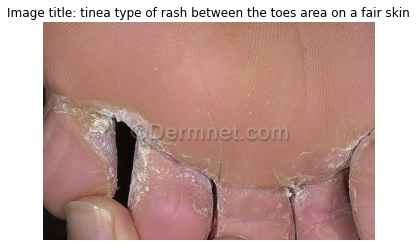

In [53]:
# Print the top predictions
print("\nTop predictions:\n")
for value, index in zip(values, indices):
    print(f"{descriptions[index][10:]:>30s}: {100 * value.item():.2f}%")

# Display the image with its title
plt.imshow(plt.imread(image_path))
plt.title(f"Image title: {image_title}")
plt.axis('off')
plt.show()